In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
df = pd.read_csv('data/data_final_problem2.csv')
df1 = pd.read_csv('data/output.csv')

In [3]:
df["Review_preprocess"] = df1.Review

In [4]:
df.head()

,Review,giai_tri,luu_tru,nha_hang,an_uong,di_chuyen,mua_sam,Review_preprocess
0,"Bánh rất nhiều tôm to, tôm giòn nằm chễm chệ t...",0,0,0,5,0,0,bánh nhiều tôm to tôm giòn nằm trên vỏ bánh mề...
1,Đi Quy Nhơn cứ lo không có pizza ăn nhưng nhờ ...,0,0,0,5,0,0,đi quy_nhơn cứ lo không pizza ăn nhưng nhờ foo...
2,"các món ăn ở đây không có gì đặc sắc, có lẽ nấ...",0,0,1,1,0,0,các món ăn_ở đây không gì đặc_sắc có_lẽ nấu th...
3,"Lần thứ 2 quay lại đây, vì giới thiệu quán cà ...",0,0,0,2,0,0,lần thứ 2 quay lại đây vì giới_thiệu quán cà_p...
4,Rất khuyên bạn nên ghé thăm quán bar thể thao này,3,0,0,0,0,0,khuyên bạn ghé thăm quán bar thể_thao này


In [5]:
df.describe()

,giai_tri,luu_tru,nha_hang,an_uong,di_chuyen,mua_sam
count,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000
mean,0.581074,0.791215,0.312636,1.677332,0.789046,0.309382
std,1.486378,1.666794,1.128391,2.148793,1.651480,1.089685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


array([[<AxesSubplot:title={'center':'giai_tri'}>,
        <AxesSubplot:title={'center':'luu_tru'}>],
       [<AxesSubplot:title={'center':'nha_hang'}>,
        <AxesSubplot:title={'center':'an_uong'}>],
       [<AxesSubplot:title={'center':'di_chuyen'}>,
        <AxesSubplot:title={'center':'mua_sam'}>]], dtype=object)

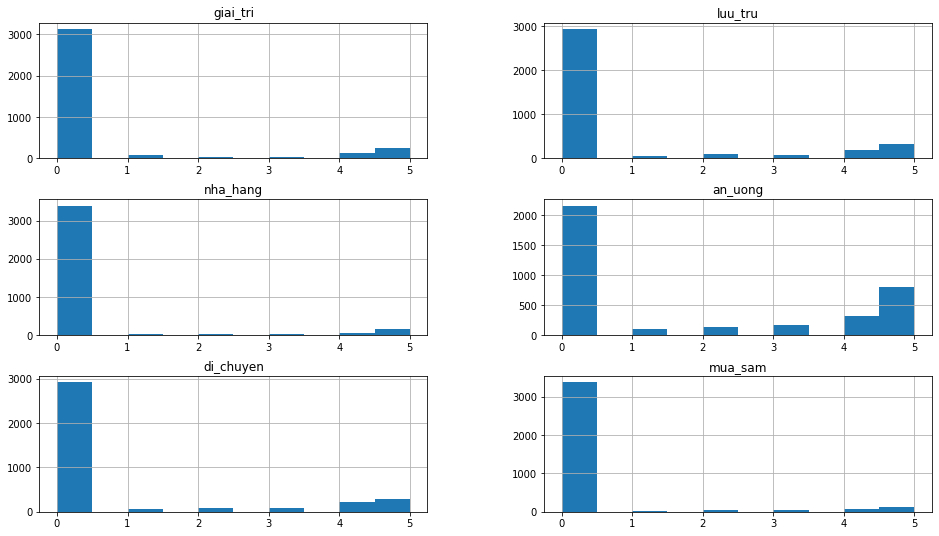

In [12]:
train_df.hist()

array([[<AxesSubplot:title={'center':'a0'}>,
        <AxesSubplot:title={'center':'a1'}>],
       [<AxesSubplot:title={'center':'a2'}>,
        <AxesSubplot:title={'center':'a3'}>],
       [<AxesSubplot:title={'center':'a4'}>,
        <AxesSubplot:title={'center':'a5'}>]], dtype=object)

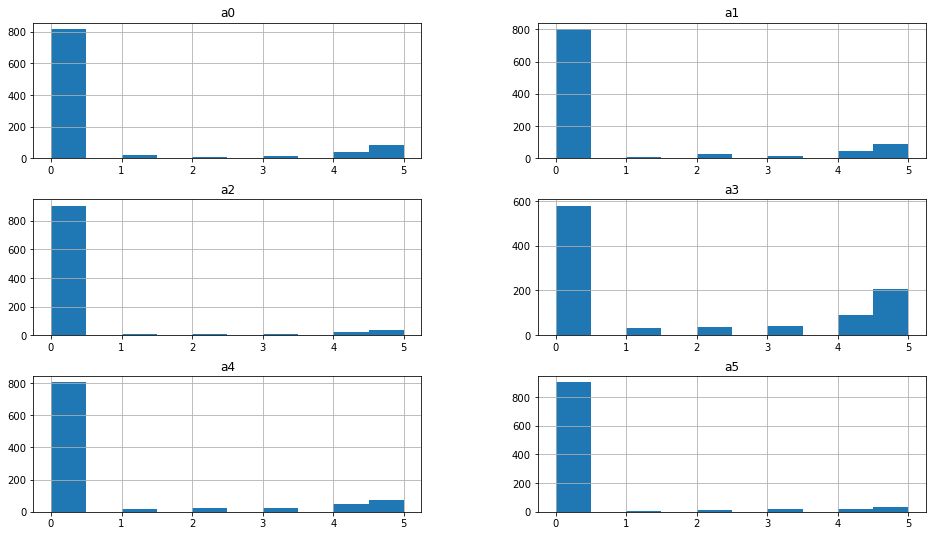

In [85]:
test_df.hist()

In [4]:
a_col = df.select_dtypes('int64').columns.to_list()

In [5]:
a_col

['giai_tri', 'luu_tru', 'nha_hang', 'an_uong', 'di_chuyen', 'mua_sam']

In [10]:
train_df.giai_tri.clip(upper=1).sum()

557

array([[<AxesSubplot:title={'center':'giai_tri'}>,
        <AxesSubplot:title={'center':'luu_tru'}>],
       [<AxesSubplot:title={'center':'nha_hang'}>,
        <AxesSubplot:title={'center':'an_uong'}>],
       [<AxesSubplot:title={'center':'di_chuyen'}>,
        <AxesSubplot:title={'center':'mua_sam'}>]], dtype=object)

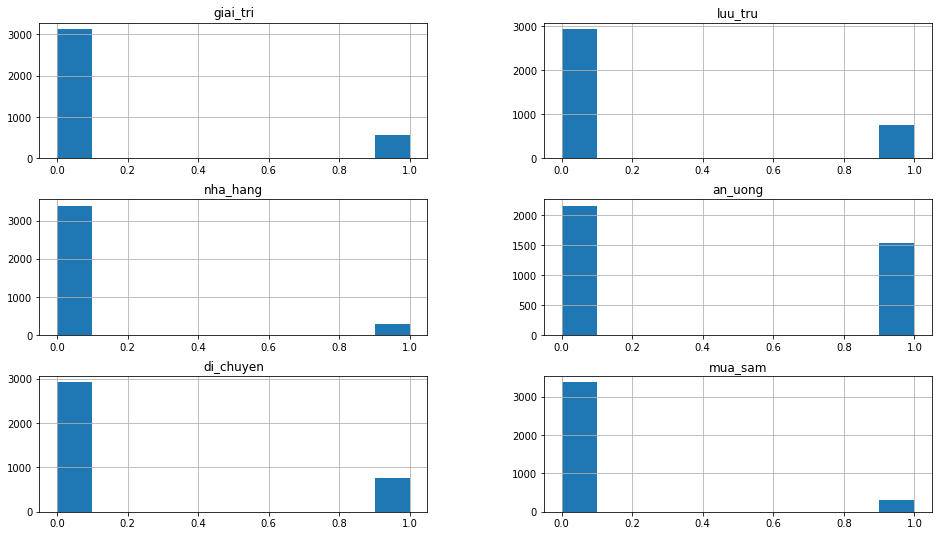

In [4]:
train_df[a_col].clip(upper=1).hist()

array([[<AxesSubplot:title={'center':'a0'}>,
        <AxesSubplot:title={'center':'a1'}>],
       [<AxesSubplot:title={'center':'a2'}>,
        <AxesSubplot:title={'center':'a3'}>],
       [<AxesSubplot:title={'center':'a4'}>,
        <AxesSubplot:title={'center':'a5'}>]], dtype=object)

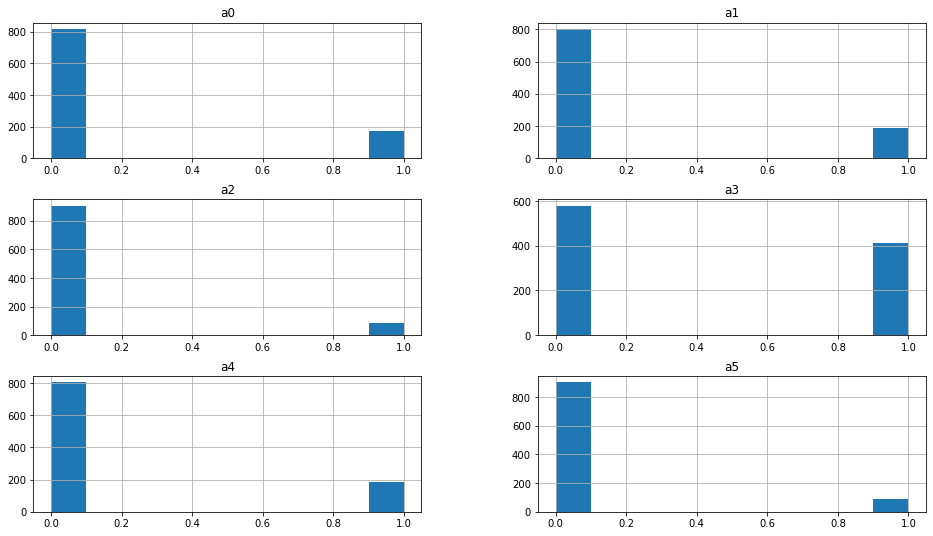

In [94]:
test_df[a_col].clip(upper=1).hist()

<AxesSubplot:ylabel='Frequency'>

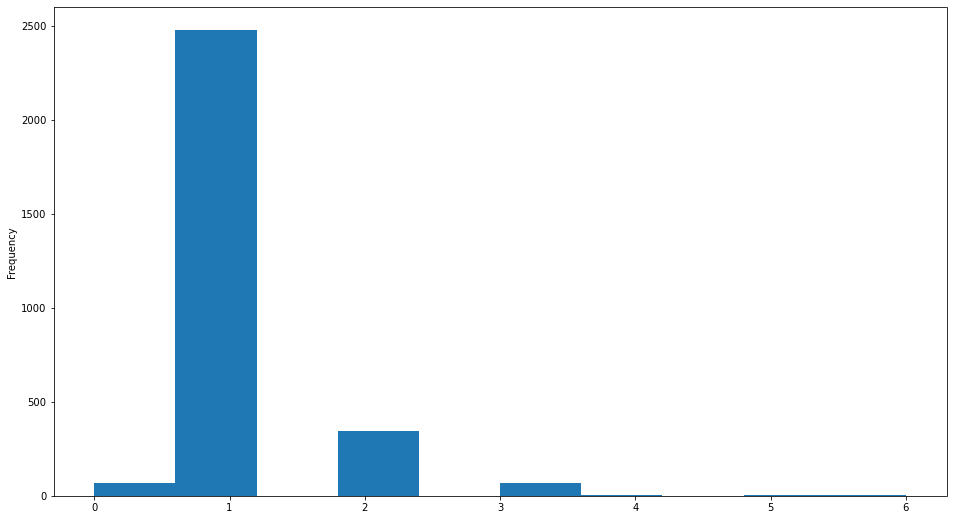

In [97]:
train_df[a_col].clip(upper=1).sum(axis=1).plot.hist()

<AxesSubplot:ylabel='Frequency'>

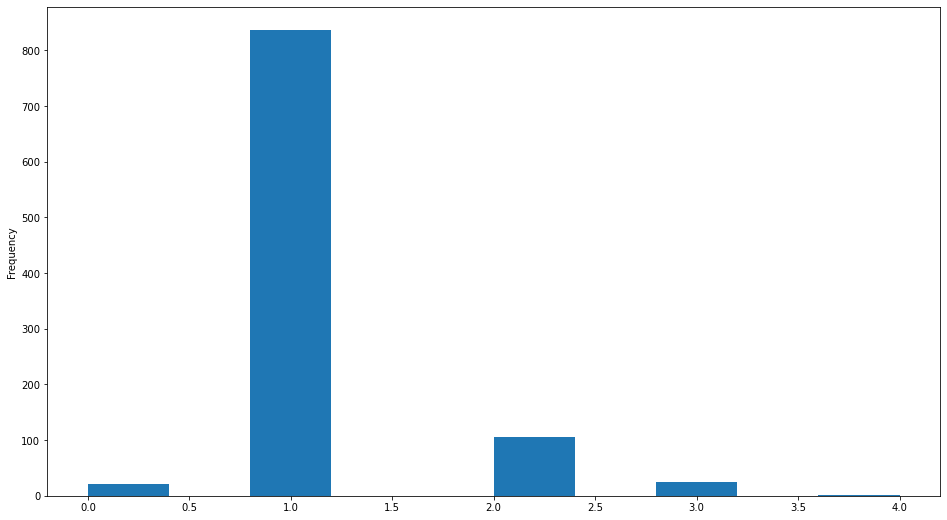

In [98]:
test_df[a_col].clip(upper=1).sum(axis=1).plot.hist()

In [100]:
train_df[a_col].clip(upper=1).sum().sum()/train_df[a_col].clip(upper=1).count().sum() * 100

19.106239460370993

In [99]:
test_df[a_col].clip(upper=1).sum().sum()/test_df[a_col].clip(upper=1).count().sum() * 100

18.975396022918773

In [5]:
import imp
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

In [5]:
train_df = df[:2955]
test_df = df[2955:]

In [8]:
train_df.head()

,Review,giai_tri,luu_tru,nha_hang,an_uong,di_chuyen,mua_sam,Review_preprocess
0,"Bánh rất nhiều tôm to, tôm giòn nằm chễm chệ t...",0,0,0,5,0,0,bánh nhiều tôm to tôm giòn nằm trên vỏ bánh mề...
1,Đi Quy Nhơn cứ lo không có pizza ăn nhưng nhờ ...,0,0,0,5,0,0,đi quy_nhơn cứ lo không pizza ăn nhưng nhờ foo...
2,"các món ăn ở đây không có gì đặc sắc, có lẽ nấ...",0,0,1,1,0,0,các món ăn_ở đây không gì đặc_sắc có_lẽ nấu th...
3,"Lần thứ 2 quay lại đây, vì giới thiệu quán cà ...",0,0,0,2,0,0,lần thứ 2 quay lại đây vì giới_thiệu quán cà_p...
4,Rất khuyên bạn nên ghé thăm quán bar thể thao này,3,0,0,0,0,0,khuyên bạn ghé thăm quán bar thể_thao này


In [6]:
x_train = train_df['Review']
y_train = train_df[a_col]
y_train_a0 = train_df['giai_tri']
y_train_a1 = train_df['luu_tru']
y_train_a2 = train_df['nha_hang']
y_train_a3 = train_df['an_uong']
y_train_a4 = train_df['di_chuyen']
y_train_a5 = train_df['mua_sam']

In [7]:
x_test = test_df['Review']
y_test = test_df[a_col]
y_test_a0 = test_df['giai_tri']
y_test_a1 = test_df['luu_tru']
y_test_a2 = test_df['nha_hang']
y_test_a3 = test_df['an_uong']
y_test_a4 = test_df['di_chuyen']
y_test_a5 = test_df['mua_sam']

In [13]:
x_train.head()

0    Bánh rất nhiều tôm to, tôm giòn nằm chễm chệ t...
1    Đi Quy Nhơn cứ lo không có pizza ăn nhưng nhờ ...
2    các món ăn ở đây không có gì đặc sắc, có lẽ nấ...
3    Lần thứ 2 quay lại đây, vì giới thiệu quán cà ...
4    Rất khuyên bạn nên ghé thăm quán bar thể thao này
Name: Review, dtype: object

In [8]:
import pandas as pd
import json
import numpy as np
import pickle
import os
import torch
import re
import string
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder

EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

def seed_everything(SEED):
    np.random.seed(SEED)
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

def remove_punctuation(text, PUNCT_TO_REMOVE):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def remove_stopwords(text, STOPWORDS):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)
    
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def add_tail_padding(series, tokenizer, max_sequence_length):
    eos_id = 2
    pad_id = 1
    outputs = []
    outputs = np.zeros((len(series), max_sequence_length))
    for idx, row in enumerate(series): 
        input_ids = tokenizer.encode(row)
        if len(input_ids) > max_sequence_length: 
            input_ids = input_ids[:max_sequence_length] 
            input_ids[-1] = eos_id
        else:
            input_ids = input_ids + [pad_id, ]*(max_sequence_length - len(input_ids))
        outputs[idx,:] = np.array(input_ids)
    return outputs

def add_tail_padding_text(text, tokenizer, max_sequence_length):
    eos_id = 2
    pad_id = 1
    outputs = []
    # outputs = np.zeros((len(series), max_sequence_length))
    # for idx, row in enumerate(text): 
    input_ids = tokenizer.encode(text)
    if len(input_ids) > max_sequence_length: 
        input_ids = input_ids[:max_sequence_length] 
        input_ids[-1] = eos_id
    else:
        input_ids = input_ids + [pad_id, ]*(max_sequence_length - len(input_ids))
    # outputs[idx,:] = np.array(input_ids)
    return input_ids

def add_head_padding(series, tokenizer, max_sequence_length):
    eos_id = 2
    pad_id = 1
    outputs = []
    outputs = np.zeros((len(series), max_sequence_length))
    for idx, row in enumerate(series): 
        input_ids = tokenizer.encode(row)
        if len(input_ids) > max_sequence_length: 
            input_ids = input_ids[len(input_ids) - (max_sequence_length - 1):]
            input_ids.append(eos_id)
        else:
            input_ids = input_ids + [pad_id, ]*(max_sequence_length - len(input_ids))
        outputs[idx,:] = np.array(input_ids)
    return outputs

def convert_to_feature(series, tokenizer, max_sequence_length, head = False):
    if not head:
        outputs = add_tail_padding(series, tokenizer, max_sequence_length)
    else:
        outputs = add_head_padding(series, tokenizer, max_sequence_length)
    return outputs

def remove_long_word(text):
    return re.sub(r'([A-Z])\1+', lambda m: m.group(1).lower(), text, flags=re.IGNORECASE)

def text_cleaner(review):
    review = review.replace('\n', ' ')
    review = review.replace('.', '. ')
    review = review.replace('-', ' ')
    review = review.replace('Pig c', 'Big C')
    review = review.replace('ks', 'khách sạn')
    review = review.replace('đt', 'điện thoại')
    review = review.replace('vsinh', 'vệ sinh')
    review = review.replace('sđt', 'số điện thoại')
    review = review.replace('QN', 'Quy Nhơn')
    review = review.replace('vs', 'với')
    review = review.replace('phcu5', 'phục')
    review = review.replace('lém', 'lắm')
    # review = review.replace('fb', 'facebook')
    review = review.replace('5sao', '5 sao')
    review = review.replace('TP', 'thành phố')
    review = review.replace('tp', 'thành phố')
    review = review.replace('Tp', 'thành phố')
    review = review.replace(' 000', '000')
    review = review.replace('HN', 'Hà Nội')
    review = review.replace('Dzô', 'vô')
    review = review.replace(' ni ', ' này ')
    review = review.replace('19 k', '19k')
    review = review.replace('cf', 'coffee')
    review = review.replace(' h ', ' giờ ')
    review = review.replace('coffe', 'coffee')
    review = review.replace('tiaafn', 'tuần')
    review = review.replace('thíh', 'thích')
    review = review.replace('viawf', 'vừa')
    review = review.replace('reccomend', 'recommend')
    review = review.replace('qá', 'quá')
    review = review.replace('zễ', 'dễ')
    review = review.replace('tưoi', 'tươi')
    # review = review.replace(' k ', ' không ')
    review = review.replace('sbay', 'sân bay')
    # review = review.replace(' đ ', ' đồng ')
    review = review.replace(' a ', ' anh ')
    review = review.replace('zể', 'dễ')
    review = review.replace('<3', '')
    review = review.replace('cới', 'cái')
    review = review.replace(' r ', ' rồi ')
    review = review.replace('ncl', 'nói chung là')
    review = review.replace('lê tân', 'lễ tân')
    review = review.replace('nèeee', 'nè')
    review = review.replace('hay nan', 'hãy nán')
    review = review.replace('vnđ', 'việt nam đồng')
    review = review.replace(' oto ', 'ô tô')
    review = review.replace('trung tân', 'trung tâm')
    review = review.replace('bsang', 'buổi sáng')
    review = review.replace('dim sum', 'dimsum')
    review = review.replace('đubgs', 'đúng')
    review = review.replace('vói', 'với')
    review = review.replace('rata', 'rất')
    review = review.replace('nưa', 'nữa')
    review = review.replace('mk', 'mình')
    review = review.replace('thik', 'thích')
    review = review.replace(' ak ', ' à ')
    review = review.replace('lagu', 'lẩu')
    review = review.replace('kco', 'không có')
    review = review.replace('xug', 'xung')
    review = review.replace('gthieu', 'giới thiệu')
    review = review.replace('ík', 'ý')
    review = review.replace('ngonnn', 'ngon')
    review = review.replace('vang tau', 'Vũng Tàu')
    review = review.replace('hanghf', 'hàng')
    review = review.replace('dứoi', 'dưới')
    review = review.replace('thàn', 'thành')
    review = review.replace('dàii', 'dài')
    review = review.replace('hơnn', 'hơn')
    review = review.replace('banf', 'bàn')
    review = review.replace('tụe', 'tự')
    review = review.replace(' od ', ' order ')
    review = review.replace('rấtttt', 'rất')
    review = review.replace('nhiệtt', 'nhiệt')
    review = review.replace('thig', 'thì')
    review = review.replace('niawx', 'nữa')
    review = review.replace('thoid', 'thói')
    review = review.replace('khanggggg', 'khang')
    review = review.replace('trangggg', 'trang')
    review = review.replace('cảh', 'cả')
    review = review.replace('ltinh', 'linh tinh')
    review = review.replace('nợi', 'nơi')
    review = review.replace('nới', 'nơi')
    review = review.replace('tôt', 'tốt')
    review = review.replace('vuii', 'vui')
    review = review.replace('lạisau', 'lại sau')
    review = review.replace(' cx ', ' cũng ')
    review = review.replace(' luac ', ' lúc ')
    review = review.replace('hiẹu', 'hiệu')
    review = review.replace('ctac', 'công tác')
    review = review.replace('veiw', 'view')
    review = review.replace('trog', 'trong')
    review = review.replace(' thíc ', ' thích ')
    review = review.replace(' cacs ', ' các ')
    review = review.replace(' gogle ', ' google ')
    review = review.replace(' lăms ', ' lắm ')
    review = review.replace(' chil ', ' chill ')
    review = review.replace('thànhhh', 'thành')
    review = review.replace(' fb ', ' facebook ')
    review = review.replace(' ko ', ' không ')
    review = review.replace(' coffeeee ', ' coffee ')
    review = review.replace(' coffeee ', ' coffee ')
    review = review.replace(' coffeeeee ', ' coffee ')
    review = review.replace(' 40ng ', ' 40 người ')
    review = review.replace(' j ', ' gì ')
    review = review.replace(' tv ', ' tivi ')
    review = review.replace(' cg ', ' cũng ')
    review = review.replace(' bik ', ' biết ')
    review = review.replace(' đg ', ' đường ')
    review = remove_emoji(review)
    review = remove_emoticons(review)
    # review = remove_long_word(review) // bị sai
    # review = '<s> '+ review +' </s>'
    # review = review.lower()
    # review = re.sub(r'[^\w\s]', '', review)
    review = re.sub("\s\s+" , " ", review)
    # review = re.sub("(\D) k " , "\\1 không ", review)
    # review = re.sub("([0-9]) k " , "\\1 nghìn ", review)
    # review = re.sub("([0-9]) đ " , "\\1 nghìn ", review)
    # review = re.sub("([0-9])k " , "\\1 nghìn ", review)
    review = review.strip()
    return review

def load_state_dict(model, checkpoint):
    new_state_dict = OrderedDict()
    for k, v in checkpoint.items():
        name = k.replace("module.", "")
        new_state_dict[name] = v
    model.load_state_dict(new_state_dict)

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def remove_freqwords(text, FREQWORDS):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

def remove_rarewords(text, RAREWORDS):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

def remove_space_between_numbers(text):
    text = re.sub(r'(\d)\s+(\d)', r'\1\2', text)
    return text

def get_new_labels(y):
    y_new = LabelEncoder().fit_transform([''.join(str(l)) for l in y])
    return y_new

def r2_score_tmp(outputs, labels):
    labels_mean = torch.mean(labels)
    ss_tot = torch.sum((labels - labels_mean) ** 2)
    ss_res = torch.sum((labels - outputs) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

In [9]:
import re
import string
def remove_long_word(text):
    return re.sub(r'([A-Z])\1+', lambda m: m.group(1).lower(), text, flags=re.IGNORECASE)
# def text_cleaner(review):
#     review = review.replace('\n', ' ')
#     review = review.replace('-', ' ')
#     review = review.replace('.', '')
#     review = re.sub("\s\s+" , " ", review)
#     # review = re.sub(r'[^\w\s]', '', review)
#     review = review.strip()
#     review = review.lower()
#     return review
remove_long_word("nèeee")

'nèe'

In [10]:
PUNCT_TO_REMOVE = '!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~’‘——“”'
x_train_cp = x_train.map(text_cleaner)
x_test_cp = x_test.map(text_cleaner)
x_train_cp = x_train_cp.apply(lambda x: remove_punctuation(x, PUNCT_TO_REMOVE))
x_test_cp = x_test_cp.apply(lambda x: remove_punctuation(x, PUNCT_TO_REMOVE))
x_train_cp = x_train_cp.apply(lambda x: x.lower())
x_test_cp = x_test_cp.apply(lambda x: x.lower())
x_train_cp = x_train_cp.map(text_cleaner)
x_test_cp = x_test_cp.map(text_cleaner)

In [50]:
from collections import Counter
cnt = Counter()
for text in x_train_cp.values:
    for word in text.split():
        cnt[word] += 1
FREQWORDS = set(["nên", "và", "có", "mình", "rất", "là", "thì", "cho", "cũng", "với"])
RAREWORDS = set([w for (w, wc) in cnt.most_common() if wc < 2])

In [51]:
with open(r'data/freq.txt', 'w', encoding='utf-8') as fp:
    for item in FREQWORDS:
        fp.write("%s\n" % item)
with open(r'data/rare.txt', 'w', encoding='utf-8') as fp1:
    for item in RAREWORDS:
        fp1.write("%s\n" % item)

In [52]:
x_train_cp = x_train_cp.apply(lambda x : remove_freqwords(x, FREQWORDS))
x_train_cp = x_train_cp.apply(lambda x : remove_rarewords(x, RAREWORDS))
x_test_cp = x_test_cp.apply(lambda x : remove_freqwords(x, FREQWORDS))
x_test_cp = x_test_cp.apply(lambda x : remove_rarewords(x, RAREWORDS))

In [10]:
x_train_cp = x_train
x_test_cp = x_test

In [11]:
x_test_cp.head()

2955                        mọi thứ quá ok so với tầm giá
2956                   nhân viên thân thiện giá cả hợp lý
2957    chợ đồ ăn vặt lớn ở miền trung việt nam gần ga...
2958    có công việc gần nó nên mình tranh thủ cùng đá...
2959    quán cà phê theo phong cách cổ điển dành cho n...
Name: Review, dtype: object

In [20]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, max_features=5000)
X = vectorizer.fit_transform(x_train_cp)
y = vectorizer.transform(x_test_cp)

In [22]:
vectorizer.get_feature_names_out().shape

(4000,)

In [23]:
train_texts=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
test_texts=pd.DataFrame(y.toarray(),columns=vectorizer.get_feature_names_out())

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
train_texts = pca.fit_transform(train_texts)
test_texts = pca.transform(test_texts)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_texts_scale = scaler.fit_transform(train_texts)
test_texts_scale = scaler.transform(test_texts)

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_texts_scale, y_train_a1)


DecisionTreeRegressor(random_state=0)

In [13]:
#########################
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb



In [18]:

# completed_pl = Pipeline([
#     ('Tfidf', TfidfVectorizer(ngram_range=(1, 3), max_df=0.5, max_features=5000)),
#     # ('scale', MinMaxScaler()),
#     ("classifier", MultiOutputRegressor(DecisionTreeRegressor(n_estimators=500, random_state=0)))
# ])

# completed_pl.fit(x_train_cp, y_train)

completed_pl = Pipeline([
    ('Tfidf', TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, max_features=4000)),
    # ('scale', MinMaxScaler()),
    ("classifier", MultiOutputRegressor(xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state=0)))
])

completed_pl.fit(x_train_cp, y_train)

Pipeline(steps=[('Tfidf',
                 TfidfVectorizer(max_df=0.5, max_features=4000,
                                 ngram_range=(1, 2))),
                ('classifier',
                 MultiOutputRegressor(estimator=XGBRegressor(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=0.8,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eta=0.1,
                                                             eval_metric=None,
                 

In [16]:
score = completed_pl.score(x_test_cp, y_test)
print("R-squared:", score)
ypred = completed_pl.predict(x_test_cp)
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

R-squared: 0.048687478182758225
MSE:  2.007787630741246
RMSE:  1.4169642305793206


In [34]:
test = set(line.strip() for line in open('data/freq.txt', 'r', encoding='utf-8'))

In [35]:
test

{'cho', 'có', 'cũng', 'là', 'mình', 'nên', 'rất', 'thì', 'và', 'với'}

In [16]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(completed_pl, open(filename, 'wb'))

In [37]:
filename = 'submit/finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)

Pipeline(steps=[('Tfidf',
                 TfidfVectorizer(max_df=0.5, max_features=4000,
                                 ngram_range=(1, 2))),
                ('classifier',
                 MultiOutputRegressor(estimator=XGBRegressor(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=0.8,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eta=0.1,
                                                             eval_metric=None,
                 

In [59]:
y_test.to_numpy()

array([[0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5],
       [0, 0, 0, 4, 0, 0],
       ...,
       [0, 5, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0]], dtype=int64)

In [17]:
ypred

array([[0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 5.],
       [0., 0., 0., 4., 0., 0.],
       ...,
       [0., 5., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 4., 0.]])

In [35]:
from sklearn.metrics import mean_squared_error
score = regressor.score(train_texts_scale, y_train_a1)
print("R-squared:", score)
ypred = regressor.predict(test_texts_scale)
mse = mean_squared_error(y_test_a1, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

R-squared: 1.0
MSE:  0.0
RMSE:  0.0


In [25]:
xgboost = XGBClassifier(max_depth=5, n_estimators=500, learning_rate=0.1)
xgboost.fit(train_texts_scale, y_train_a0)
train_results=xgboost.predict(train_texts_scale)
test_results=xgboost.predict(test_texts_scale)
f1_train=f1_score(y_train_a0, train_results)
print(f'F1 score on train set {f1_train}')
f1_test=f1_score(y_test_a0, test_results)
print(f'F1 score on test set {f1_test}')

F1 score on train set 0.9761029411764706
F1 score on test set 0.9732620320855615


In [47]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
print(classification_report(train_results, y_train_a0))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2549
           1       0.88      1.00      0.93       406

    accuracy                           0.98      2955
   macro avg       0.94      0.99      0.96      2955
weighted avg       0.98      0.98      0.98      2955



In [102]:
from sklearn.svm import LinearSVC
linear = LinearSVC()
linear.fit(train_texts_scale, y_train_a0)
train_results=linear.predict(train_texts_scale)
test_results=linear.predict(test_texts_scale)
f1_train=f1_score(y_train_a0, train_results)
print(f'F1 score on train set {f1_train}')
f1_test=f1_score(y_test_a0, test_results)
print(f'F1 score on test set {f1_test}')

F1 score on train set 1.0
F1 score on test set 0.3563218390804597


In [27]:
import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_linnerud
# create sample dataset
X, y = load_linnerud(return_X_y=True)

In [111]:
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic')
multilabel_model = MultiOutputClassifier(xgb_estimator)
multilabel_model.fit(train_texts_scale, y_train)
train_results=multilabel_model.predict(train_texts_scale)
test_results=multilabel_model.predict(test_texts_scale)
# f1_train=f1_score(y_train_a0, train_results)
# print(f'F1 score on train set {f1_train}')
# f1_test=f1_score(y_test_a0, test_results)
# print(f'F1 score on test set {f1_test}')

In [114]:
y_test

,giai_tri,luu_tru,nha_hang,an_uong,di_chuyen,mua_sam
2955,0,1,0,0,0,0
2956,0,0,0,0,0,1
2957,0,0,0,1,0,0
2958,0,0,0,1,0,0
2959,0,0,0,1,0,0
...,...,...,...,...,...,...
3683,0,0,0,1,0,0
3684,1,0,0,0,0,0
3685,0,1,0,0,0,0
3686,1,0,0,0,0,0


In [123]:
for i in range(6):
    print('F1 {}: {:.5f}'.format(i, accuracy_score(y_test.to_numpy()[:, i], test_results[:, i])))

F1 0: 0.88267
F1 1: 0.95225
F1 2: 0.91132
F1 3: 0.90859
F1 4: 0.93042
F1 5: 0.95907


In [ ]:
print('F1: {:.5f}'.format(accuracy_score(y_test.to_numpy()[:, 1], test_results[:, 0])))

In [117]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, test_results)*100))

Accuracy on test data: 65.5%
